데이터 불러오기

In [392]:
# 데이터 불러오기

import pandas as pd
import numpy as np
import random as rnd

In [393]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [394]:
# 머신러닝
# pip install scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [395]:
train_df=pd.read_csv(r"D:\논문\스터디_1주차_타이타닉_데이터분석(ML)\데이터\train.csv")
test_df=pd.read_csv(r"D:\논문\스터디_1주차_타이타닉_데이터분석(ML)\데이터\test.csv")
# 모델 적용의 일관성을 위해,
# train과 test를 합한 combine 데이터 셋 지정
combine=[train_df,test_df]

데이터 변수 확인

In [396]:
train_column_list = list(train_df.columns)
print(train_column_list)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [397]:
test_column_list = list(test_df.columns)
print(test_column_list)

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


Train, Test 정보 확인

In [398]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [399]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Train, Test 결측치 확인

In [400]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [401]:
test_df.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Train, Test 고유값 확인

In [402]:
# train_df column의 고유값 종류 확인
for column in train_column_list:
    print(f'{column} types : ', train_df[column].nunique())

PassengerId types :  891
Survived types :  2
Pclass types :  3
Name types :  891
Sex types :  2
Age types :  88
SibSp types :  7
Parch types :  7
Ticket types :  681
Fare types :  248
Cabin types :  147
Embarked types :  3


In [403]:
# test_df column의 고유값 종류 확인
for column in test_column_list:
    print(f'{column} types : ', test_df[column].nunique())

PassengerId types :  418
Pclass types :  3
Name types :  418
Sex types :  2
Age types :  79
SibSp types :  7
Parch types :  8
Ticket types :  363
Fare types :  169
Cabin types :  76
Embarked types :  3


Train, Test 데이터 확인

In [404]:
# 데이터 미리 보기
display(train_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [405]:
# 데이터 미리 보기
display(train_df.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Train 데이터 분석

In [406]:
# 훈련 데이터 통계치
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [407]:
# 훈련 자료 object 변수 통계치
train_df.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


고유값이 많은 열은 정리가 필요해보인다.
특히 Ticket과 Cabin.
Name은 [성][호칭][이름] 규칙이 있으니, 호칭만 살리는 방법이 있을거 같다

In [408]:
train_df.describe(include="int")

,PassengerId,Survived,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594
std,257.353842,0.486592,0.836071,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000


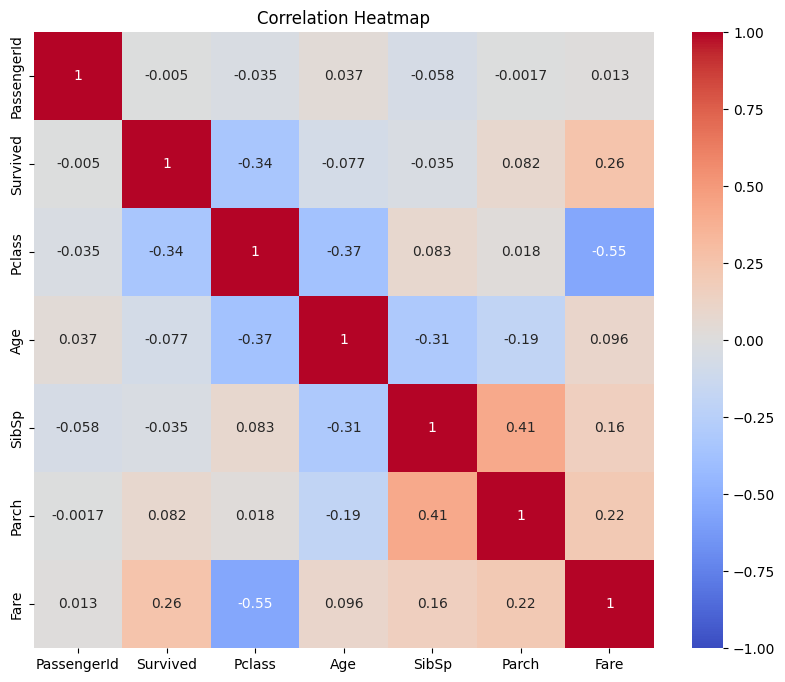

In [409]:
# 수치형 및 불리형 One-hot 컬럼만 선택
corr_matrix = train_df.corr(numeric_only=True)

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

데이터 전처리

In [410]:
print("Before", train_df.shape, test_df.shape)

# 열(axis=1)제거
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]
print("After", train_df.shape, test_df.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9)


In [411]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [412]:
for dataset in combine:
    dataset['Title'] = train_df["Name"].str.split(",").str[1].str.split(".").str[0].str.strip()

pd.crosstab(train_df['Title'], train_df['Sex'])
# [성][호칭][이름]에서 성별 호칭 추출

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


주요 명칭 외에는 Rare로 분류하자

In [413]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'the Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Title을 int형 변환

In [414]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


안쓰는 열(Name, PassengerId)도 마저 지우자

In [415]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [416]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


성별 male, female -> 숫자 1, 0 변환하자
나이도 정수형 변환하고

In [417]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'male': 1, 'female': 0} ).astype(int)
    dataset['Age'] = dataset['Age'].fillna(0).apply(lambda x: 0 if x < 1 else int(x))
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22,1,0,7.2500,S,1
1,1,1,0,38,1,0,71.2833,C,3
2,1,3,0,26,0,0,7.9250,S,2
3,1,1,0,35,1,0,53.1000,S,3
4,0,3,1,35,0,0,8.0500,S,1


결측치 채우기

In [418]:
# 먼저 각 그룹의 평균 나이 계산
grouped_ages = train_df.groupby(['Pclass', 'Sex', 'Embarked'])['Age'].mean() # 이 집단의 중간값 나이

# 결측치를 채우는 함수
def fill_age(df):
    if pd.isnull(df['Age']):
        return grouped_ages.loc[df['Pclass'], df['Sex'], df['Embarked']]
    return df['Age']

# 결측치 채우기
train_df['Age'] = train_df.apply(fill_age, axis=1)


Age 범주형 변경

In [419]:
def age_label(age):
    if pd.isnull(age):  # 결측값 처리
        return None
    elif age <= 7:
        return 0  # 어린이
    elif age <= 15:
        return 1  # 청소년
    elif age <= 30:
        return 2  # 청년
    elif age <= 60:
        return 3  # 장년
    else:
        return 4  # 노년

# 새로운 열 추가
train_df["AgeGroup"] = train_df["Age"].apply(age_label)
test_df["AgeGroup"] = test_df["Age"].apply(age_label)

In [420]:
train_df = train_df.drop(['Age'], axis=1)
test_df = test_df.drop(['Age'], axis=1)

In [421]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,1,1,0,7.2500,S,1,2
1,1,1,0,1,0,71.2833,C,3,3
2,1,3,0,0,0,7.9250,S,2,2
3,1,1,0,1,0,53.1000,S,3,3
4,0,3,1,0,0,8.0500,S,1,3


In [422]:
test_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,892,3,1,0,0,7.8292,Q,1,3
1,893,3,0,1,0,7.0000,S,3,3
2,894,2,1,0,0,9.6875,Q,2,4
3,895,3,1,0,0,8.6625,S,3,2
4,896,3,0,1,1,12.2875,S,1,2


Sibs, Parch = isAlone(혼자왔어?)으로 변경

In [423]:
train_df['isAlone'] = ((train_df['SibSp'] > 0) | (train_df['Parch'] > 0)).astype(int)
test_df['isAlone'] = ((test_df['SibSp'] > 0) | (test_df['Parch'] > 0)).astype(int)

In [424]:
train_df = train_df.drop(['SibSp'], axis=1)
train_df = train_df.drop(['Parch'], axis=1)
test_df = test_df.drop(['SibSp'], axis=1)
test_df = test_df.drop(['Parch'], axis=1)

In [425]:
train_df.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,AgeGroup,isAlone
0,0,3,1,7.2500,S,1,2,1
1,1,1,0,71.2833,C,3,3,1
2,1,3,0,7.9250,S,2,2,0
3,1,1,0,53.1000,S,3,3,1
4,0,3,1,8.0500,S,1,3,0


In [426]:
test_df.head()

,PassengerId,Pclass,Sex,Fare,Embarked,Title,AgeGroup,isAlone
0,892,3,1,7.8292,Q,1,3,0
1,893,3,0,7.0000,S,3,3,1
2,894,2,1,9.6875,Q,2,4,0
3,895,3,1,8.6625,S,3,2,0
4,896,3,0,12.2875,S,1,2,1


승선지(Ebmarked) 변수를 최빈값으로 대체

In [427]:
freq_port = train_df.Embarked.dropna().mode()[0] # Embarked에서 .mode()[0] 첫 번째 최빈값 반환

# 결측치를 최빈값으로 채움
train_df['Embarked'].fillna(freq_port, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16992\1508463376.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(freq_port, inplace=True)


In [428]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Fare        0
Embarked    0
Title       0
AgeGroup    0
isAlone     0
dtype: int64

In [429]:
train_df.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,AgeGroup,isAlone
0,0,3,1,7.2500,S,1,2,1
1,1,1,0,71.2833,C,3,3,1
2,1,3,0,7.9250,S,2,2,0
3,1,1,0,53.1000,S,3,3,1
4,0,3,1,8.0500,S,1,3,0


In [430]:
fare_port = test_df.Fare.dropna().mode()[0] # Embarked에서 .mode()[0] 첫 번째 최빈값 반환

# 결측치를 최빈값으로 채움
test_df['Fare'].fillna(fare_port, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16992\3927784660.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(fare_port, inplace=True)


In [431]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Fare           0
Embarked       0
Title          0
AgeGroup       0
isAlone        0
dtype: int64

승선지 -> S 0, C 1, Q 2 변경

In [432]:
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [433]:
train_df.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,AgeGroup,isAlone
0,0,3,1,7.2500,0,1,2,1
1,1,1,0,71.2833,1,3,3,1
2,1,3,0,7.9250,0,2,2,0
3,1,1,0,53.1000,0,3,3,1
4,0,3,1,8.0500,0,1,3,0


In [434]:
test_df.head()

,PassengerId,Pclass,Sex,Fare,Embarked,Title,AgeGroup,isAlone
0,892,3,1,7.8292,2,1,3,0
1,893,3,0,7.0000,0,3,3,1
2,894,2,1,9.6875,2,2,4,0
3,895,3,1,8.6625,0,3,2,0
4,896,3,0,12.2875,0,1,2,1


요금 숫자 범주형 변경

In [435]:
train_df['FareGroup'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup', ascending=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16992\3926165469.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup', ascending=True)


,FareGroup,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [436]:
test_df['FareGroup'] = pd.qcut(test_df['Fare'], 4)

In [437]:
def fare_label(fare):
    if pd.isnull(fare):  # 결측값 처리
        return None
    elif fare <= 8:
        return 0  # 쌈
    elif fare <= 15:
        return 1  # 비쌈
    elif fare <= 31:
        return 2  # 엄청 비쌈
    else:
        return 3  # 상당히 비쌈

# 새로운 열 추가
train_df["Fare"] = train_df["Fare"].apply(fare_label)
test_df["Fare"] = test_df["Fare"].apply(fare_label)

# faregroup 삭제
train_df = train_df.drop(['FareGroup'], axis=1)
test_df = test_df.drop(['FareGroup'], axis=1)

In [438]:
train_df.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,AgeGroup,isAlone
0,0,3,1,0,0,1,2,1
1,1,1,0,3,1,3,3,1
2,1,3,0,0,0,2,2,0
3,1,1,0,3,0,3,3,1
4,0,3,1,1,0,1,3,0


In [439]:
test_df.head()

,PassengerId,Pclass,Sex,Fare,Embarked,Title,AgeGroup,isAlone
0,892,3,1,0,2,1,3,0
1,893,3,0,0,0,3,3,1
2,894,2,1,1,2,2,4,0
3,895,3,1,1,0,3,2,0
4,896,3,0,1,0,1,2,1


모델링 준비

In [440]:
# 목적 변수 제거
X_train = train_df.drop("Survived", axis=1)
#목적 변수 역할
Y_train = train_df["Survived"]
#예측 대상 데이터 셋
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [441]:
X_train.head()

,Pclass,Sex,Fare,Embarked,Title,AgeGroup,isAlone
0,3,1,0,0,1,2,1
1,1,0,3,1,3,3,1
2,3,0,0,0,2,2,0
3,1,0,3,0,3,3,1
4,3,1,1,0,1,3,0


In [442]:
X_test.head()

,Pclass,Sex,Fare,Embarked,Title,AgeGroup,isAlone
0,3,1,0,2,1,3,0
1,3,0,0,0,3,3,1
2,2,1,1,2,2,4,0
3,3,1,1,0,3,2,0
4,3,0,1,0,1,2,1


모델링

In [443]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.01

In [444]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.73

In [445]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.88

In [446]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

61.95

In [447]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(acc_linear_svc)

78.45


In [448]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.78

In [449]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

87.65

In [450]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.65

In [451]:
# K-NN(K Nearest Neighberhood)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.19

In [452]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.65
8,Decision Tree,87.65
1,KNN,85.19
0,Support Vector Machines,83.73
2,Logistic Regression,79.01
7,Linear SVC,78.45
6,Stochastic Gradient Decent,77.78
4,Naive Bayes,76.88
5,Perceptron,61.95


In [453]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

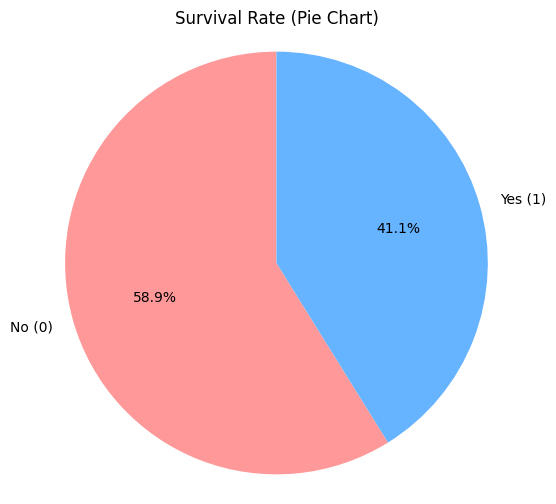

In [454]:
# 라벨과 값 설정
labels = ['No (0)', 'Yes (1)']
sizes = submission['Survived'].value_counts().values

# 원형 차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Survival Rate (Pie Chart)')
plt.axis('equal')  # 원을 동그랗게 유지
plt.show()